In [ ]:
import pandas as pd

nodes = pd.read_csv("../data/raw/nodes.csv")
edges = pd.read_csv("../data/raw/edges.csv")
metrics = pd.read_csv("../data/raw/metrics_long.csv")

metrics["timestamp"] = pd.to_datetime(metrics["timestamp"]) 

# “This line converts the timestamp column into a proper datetime format so the data 
# can be handled as a time series for sorting, aggregation, and anomaly detection.”


In [ ]:
# nodes.head()
# edges.head()
# metrics.head()

# metrics.isna().sum()
metrics.describe()       #values ranges

,timestamp,value
count,27,27.000000
mean,2026-01-01 01:00:00,130.803704
min,2026-01-01 00:00:00,0.100000
25%,2026-01-01 00:00:00,1.250000
50%,2026-01-01 01:00:00,20.000000
75%,2026-01-01 02:00:00,76.000000
max,2026-01-01 02:00:00,690.000000
std,NaN,212.751613


In [15]:
#metrics.head(10)
metrics.shape
metrics.info()

metrics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    27 non-null     datetime64[ns]
 1   node_id      27 non-null     object        
 2   metric_name  27 non-null     object        
 3   value        27 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 996.0+ bytes


,timestamp,node_id,metric_name,value
0,2026-01-01 00:00:00,R1,latency_ms,12.5
1,2026-01-01 00:00:00,R1,packet_loss_pct,0.2
2,2026-01-01 00:00:00,R1,traffic_mbps,520.0
3,2026-01-01 00:00:00,SW1,latency_ms,8.3
4,2026-01-01 00:00:00,SW1,packet_loss_pct,0.1
5,2026-01-01 00:00:00,SW1,traffic_mbps,410.0
6,2026-01-01 00:00:00,SV1,cpu_pct,35.0
7,2026-01-01 00:00:00,SV1,mem_pct,61.0
8,2026-01-01 00:00:00,AUTH,error_rate_pct,0.4
9,2026-01-01 01:00:00,R1,latency_ms,13.2


In [ ]:
metrics.groupby(['node_id','metric_name']).size()

node_id  metric_name    
AUTH     error_rate_pct     3
R1       latency_ms         3
         packet_loss_pct    3
         traffic_mbps       3
SV1      cpu_pct            3
         mem_pct            3
SW1      latency_ms         3
         packet_loss_pct    3
         traffic_mbps       3
dtype: int64

Simple time-series plots

Pick one node, plot all its metrics:

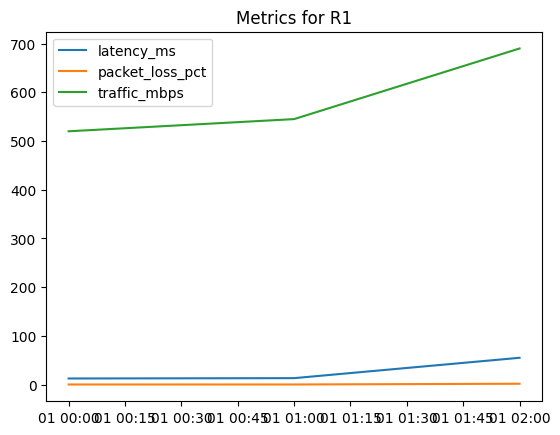

In [ ]:
import matplotlib.pyplot as plt

node = "R1"
subset = metrics[metrics["node_id"] == node]   #filter metrics for a specific node R1

for m in subset["metric_name"].unique():   #loop through each unique metric name
    data = subset[subset["metric_name"] == m]
    plt.plot(data["timestamp"], data["value"], label=m)

plt.legend()
plt.title(f"Metrics for {node}")
plt.show()



“These metrics are time-aligned”

“Ranges are valid”

“Anomalies are visible”

“Data is ready for modeling”